In [1]:
# nessary library for the project 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# saving the data in a variable  
df = pd.read_csv(r"concrete_data.csv")

In [3]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


> ### link --- https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set

##  About this file


    Name -- Data Type -- Measurement -- Description
    Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
    Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
    Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
    Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
    Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
    Age -- quantitative -- Day (1~365) -- Input Variable
    Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [4]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [5]:
df.duplicated().sum()

25

In [6]:
df.shape

(1030, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


 ### this is s supervise learning problem because it  has input as well as output features 

### for these model we will use differnt regression algorithms because the data is in the discrete format 

> ## EDA

<Axes: >

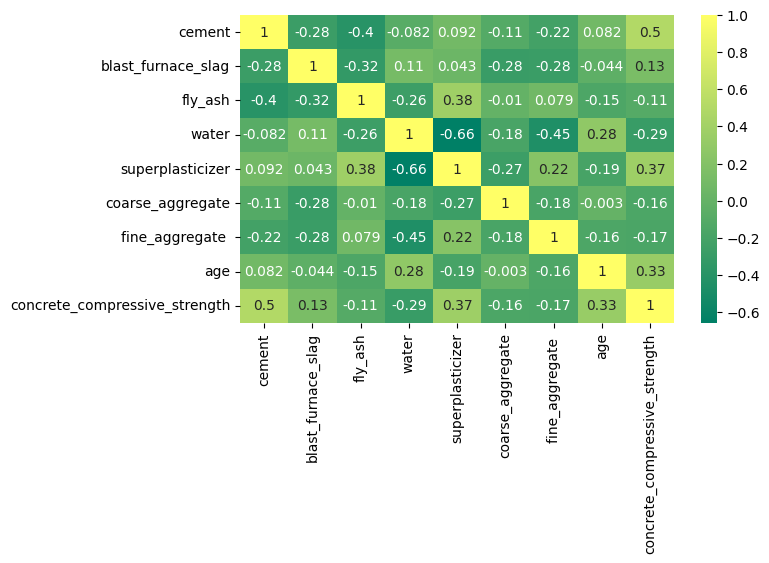

In [9]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True ,cmap='summer')

<Axes: >

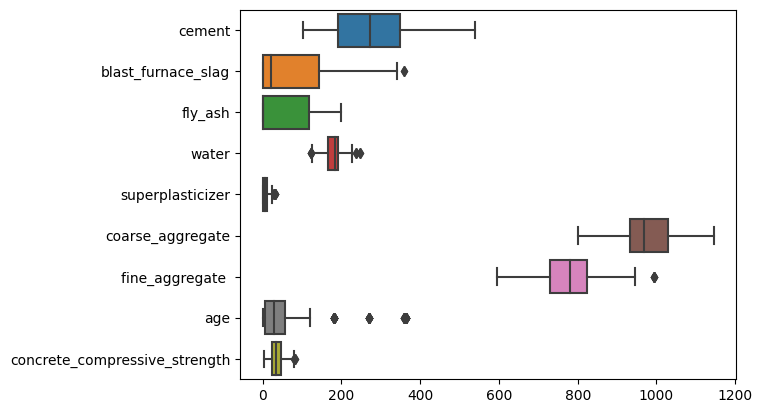

In [10]:

sns.boxplot(df,orient = 'h')

 cheking the distrubuion of the data  

> ## Train test split 

In [11]:
x = df.drop('concrete_compressive_strength', axis= 1)
y = df['concrete_compressive_strength']

In [12]:
x.shape

(1030, 8)

In [13]:
y.shape

(1030,)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

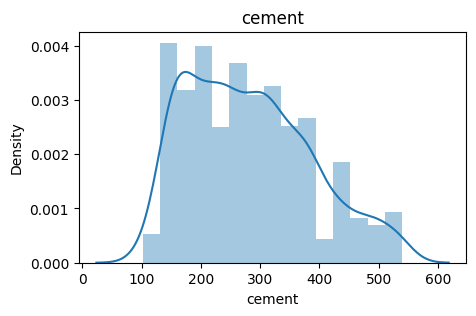

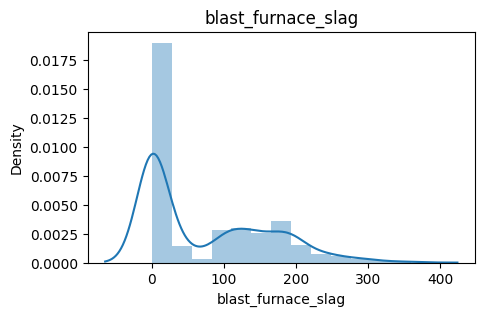

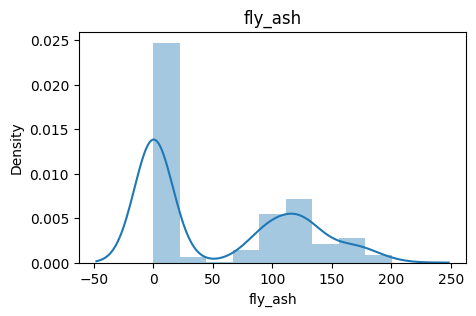

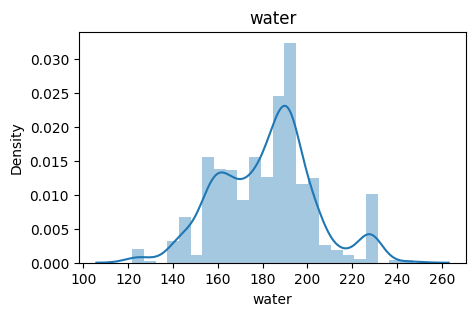

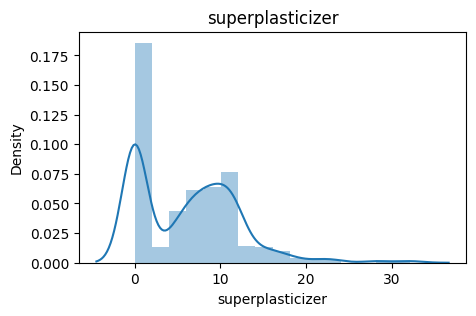

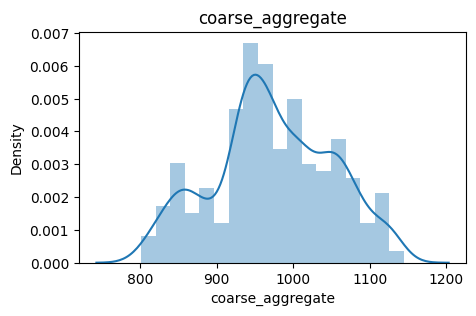

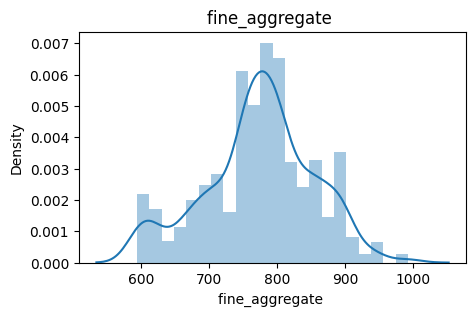

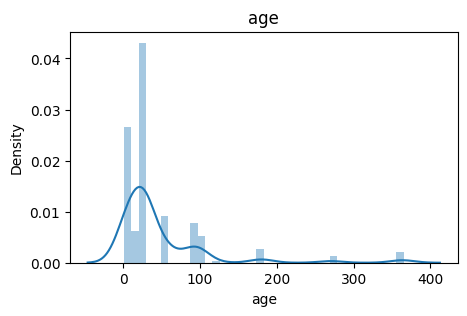

In [16]:
for i  in X_train :
    plt.figure(figsize=(5,3))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

> # power transformer 

In [17]:
from sklearn.preprocessing import PowerTransformer

In [18]:
pt = PowerTransformer()

In [19]:
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.fit_transform(X_test)

In [20]:
X_train.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'],
      dtype='object')

In [21]:
X_train_transformed = pd.DataFrame(X_train_transformed ,columns=X_train.columns)

In [22]:
X_train_transformed.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,-1.279751,1.018168,1.130993,-0.301917,1.250424,-0.262504,-0.677567,0.105778
1,1.244813,0.222584,1.166671,-0.165051,0.643937,-1.912717,-0.314063,0.105778
2,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,-1.664976
3,-0.145770,0.835725,1.009268,0.581232,0.585508,-1.750770,0.583249,0.105778
4,-1.131111,0.487511,1.150162,-1.105305,0.886463,1.368579,0.262619,-1.664976


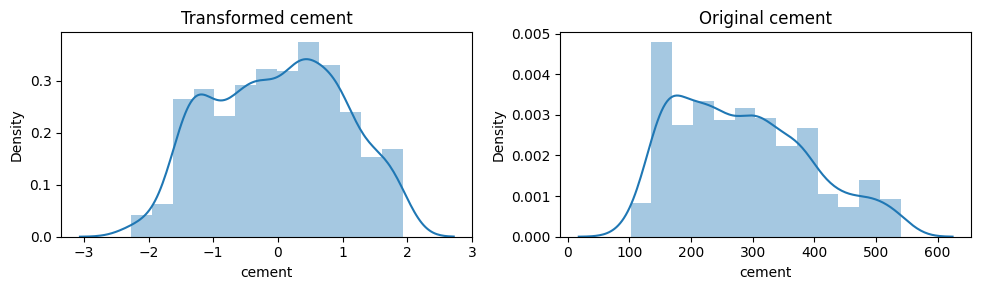

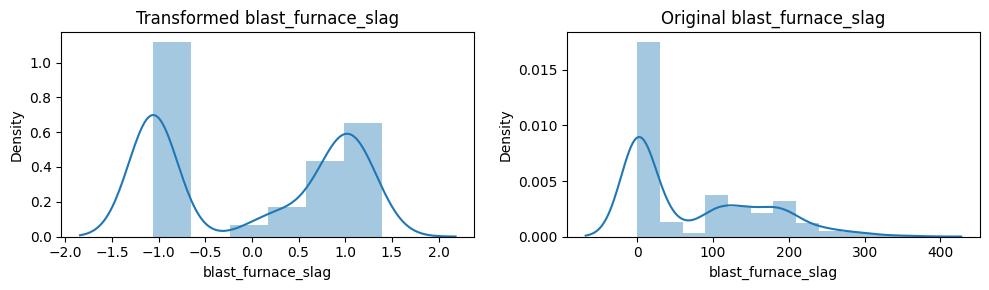

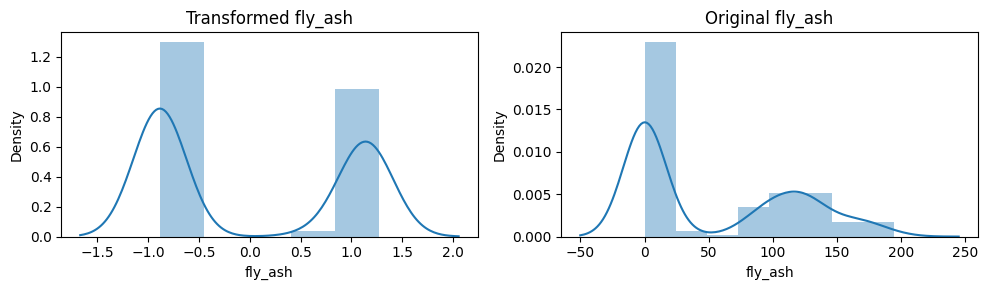

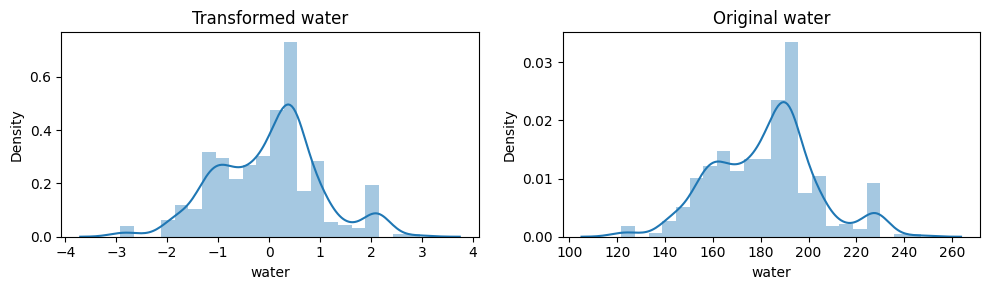

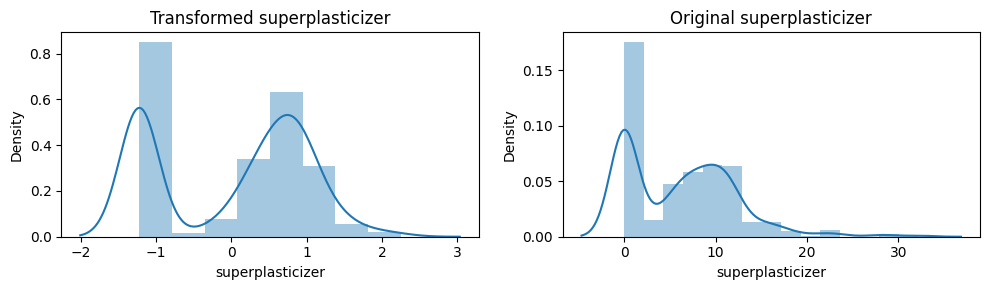

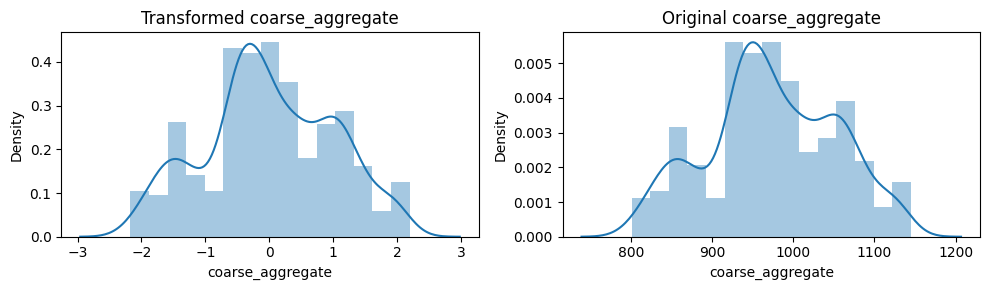

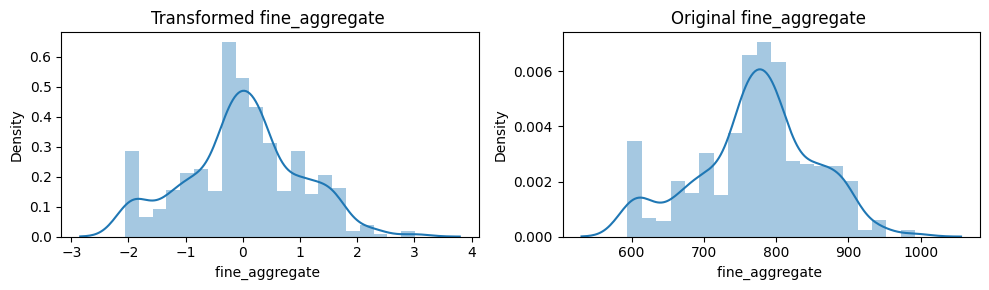

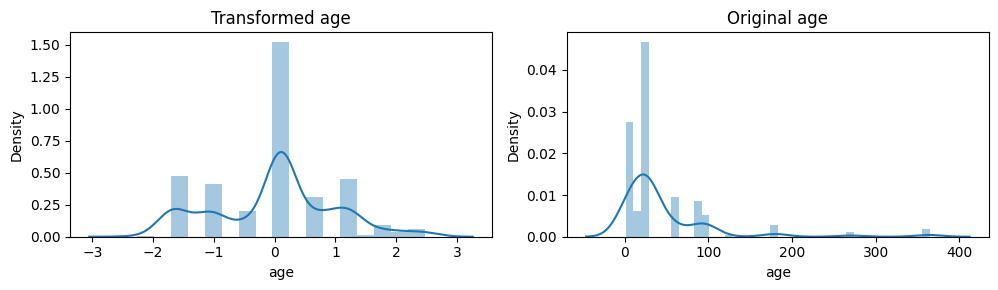

In [23]:
# comparision after the power transform 
# chat gpt 
for i in X_train_transformed.columns:
    # Create a figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    
    # Plot the distribution of the transformed feature
    sns.distplot(X_train_transformed[i], ax=axes[0])
    axes[0].set_title(f'Transformed {i}')
    
    # Plot the distribution of the original feature
    sns.distplot(X_train[i], ax=axes[1])
    axes[1].set_title(f'Original {i}')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

> ### standard scaler 
for making the hole data into one range 

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss =StandardScaler()

In [26]:
X_test_transformed = ss.fit_transform(X_test_transformed)
X_train_transformed = ss.fit_transform(X_train_transformed)

In [27]:
# all have come in the range of 0 to 1 
X_train_transformed

array([[-1.2797506 ,  1.0181684 ,  1.13099335, ..., -0.26250397,
        -0.67756699,  0.10577763],
       [ 1.2448127 ,  0.22258409,  1.16667068, ..., -1.91271708,
        -0.3140633 ,  0.10577763],
       [ 0.07975145, -1.05692806,  1.14363683, ...,  1.01840694,
         0.02595441, -1.664976  ],
       ...,
       [-0.84466055, -1.05692806,  1.15215184, ...,  1.34537013,
         0.29715299,  1.25751143],
       [ 1.56574084,  0.92179625, -0.88493182, ..., -1.53724924,
         0.07620785,  0.10577763],
       [ 0.42653433, -1.05692806,  1.12367271, ..., -0.62083672,
         0.09510487,  0.10577763]])

> ## importing the required models 

In [28]:
# models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor

# for overfitting if happend 
from sklearn.linear_model import Lasso ,Ridge

# to cheak the resudiual 

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score




In [29]:
models = {
    'lr' :LinearRegression() ,
    'dt' : DecisionTreeRegressor() ,
    'rf' : RandomForestRegressor(n_estimators=100 , random_state=42),
    'ad' : AdaBoostRegressor(n_estimators = 50 ,learning_rate=0.1,random_state=42),
    'gb' :GradientBoostingRegressor(n_estimators=100 ,max_depth=3,learning_rate=0.1) ,
    'xg' : XGBRFRegressor(randomstate = 42,max_depth = 3,learnig_rate=0.1,n_estimators=100),

    #overfitiing 
    'l' : Lasso() ,
    'r' : Ridge() ,

}

In [30]:
for name ,model in models.items():
    model.fit(X_train_transformed,y_train)
    y_pred = model.predict(X_test_transformed)


    print(f"{name} : mse = {mean_squared_error(y_test ,y_pred)} , r2 = {r2_score(y_test,y_pred)}")

lr : mse = 47.571135420915816 , r2 = 0.8153845515001847
dt : mse = 64.2367223300971 , r2 = 0.7507082562104491
rf : mse = 36.434184839327365 , r2 = 0.8586051538328386
ad : mse = 87.4167122255064 , r2 = 0.6607506759908978
gb : mse = 37.237037805223295 , r2 = 0.8554894186487438
xg : mse = 101.36405779488663 , r2 = 0.6066234108985256
l : mse = 53.25056143750568 , r2 = 0.7933436695242364
r : mse = 47.5716083533945 , r2 = 0.8153827161300409


> vv

> hyper parameter tuning 

In [32]:
param_grids = {
    'lr': {},
    'dt': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'rf': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'ad': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'gb': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    },
    'xg': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    },
    'l': {
        'alpha': [0.1, 0.5, 1.0]
    },
    'r': {
        'alpha': [0.1, 0.5, 1.0]
    }
}


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Assuming X_train_transformed, X_test_transformed, y_train, and y_test are defined

for name, model in models.items():
    if param_grids[name]:  # Check if there are parameters to tune
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_transformed, y_train)
        best_model = grid_search.best_estimator_
    else:
        model.fit(X_train_transformed, y_train)
        best_model = model

    y_pred = best_model.predict(X_test_transformed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(best_model)
    


KeyError: 'lin_reg'

In [ ]:
# without the best parameter 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Assuming X_train_transformed, X_test_transformed, y_train, and y_test are defined

for name, model in models.items():
    if param_grids[name]:  # Check if there are parameters to tune
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_transformed, y_train)
        best_model = grid_search.best_estimator_
    else:
        model.fit(X_train_transformed, y_train)
        best_model = model

    y_pred = best_model.predict(X_test_transformed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # print(best_model)
    print(f"{name} : mse = {mse} , r2 = {r2}")


> ### the end we can say that our __xgboost__ is providing the higest accuracy for that reason we will use that for the end model 

In [35]:
gb = GradientBoostingRegressor(max_depth=5, n_estimators=200)
gb.fit(X_train_transformed,y_train)
y_pred = gb.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.8872730788243484

> ## manually model predection 

In [36]:
def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = gb.predict(features).reshape(1,-1)
    
    return prediction[0]


In [ ]:
cem = 158.60
blastf = 148.90
flyas = 116.00
water = 175.10
superplaster = 15.00
courseagg = 953.3
fineagg = 719.70
age = 28

prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)
print("strength is : ",prediction)

strength is :  [52.99922009]


> ## saving the model 

In [ ]:
import pickle
pickle.dump(gb,open('model.pkl','wb'))